In [ ]:
root = '/content/drive/My Drive/nlp-lab'
datasets_location = root + '/data/original-datasets/amazon-german-dataset2'
processed_data_location = root + '/data/processed-data/amazon-german2'

In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd
import gzip
import math
import numpy as np
from google.colab import drive
from sys import path
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import lxml

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
drive.mount('/content/drive', force_remount=True)
path.append(root)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
reviews_df = pd.read_json(datasets_location + "/dataset_de_train.json",lines=True)

In [ ]:
#Data exploration
print(reviews_df.shape[0])
categories = reviews_df["product_category"].unique()
counts = reviews_df["product_category"].value_counts()
#categories
counts
#len(categories)
#print(categories)
#reviews_df.head(5)

200000


home                        26063
wireless                    19964
sports                      13748
home_improvement            12408
apparel                     10178
toy                          9781
pc                           8577
drugstore                    8075
lawn_and_garden              7426
beauty                       7162
electronics                  7114
other                        6460
furniture                    6334
kitchen                      5787
automotive                   5321
pet_products                 5028
book                         4927
office_product               4343
baby_product                 4070
shoes                        3568
luggage                      3256
digital_video_download       2970
personal_care_appliances     2836
grocery                      2737
digital_ebook_purchase       2720
jewelry                      2380
camera                       1906
watch                        1706
video_games                  1219
industrial_sup

In [ ]:
relevant_categories = ["grocery", "beauty"]
reviews_filtered_df = reviews_df.loc[reviews_df['product_category'].isin(relevant_categories)]
counts = reviews_filtered_df["product_category"].value_counts()
counts
#reviews_filtered_df.shape[0]

reviews_filtered_df.to_json(datasets_location + '/raw_data_german2.json')

beauty     7162
grocery    2737
Name: product_category, dtype: int64

In [ ]:
def getSentimentFromRating(rating):

    sentiment = "0"
    
    if rating < 3:
        sentiment = "n"
    elif rating == math.floor(3):
        sentiment = "0"
    else:
        sentiment = "p"
    
    return sentiment

In [ ]:
def processDataFrame(dataframe):
    
    processed_df = pd.DataFrame(columns = ['comment_id','sentence_id','comment_rating','comment_sentiment','sentence_text','number_of_tokens','dataset_name'])
    number_of_rows = dataframe.shape[0]

    counter = 0
    for index, row in dataframe.iterrows():

        if counter%100 == 0:
            print('processed rows: ' + str(counter) + '/' + str(number_of_rows) + ' - percentage: ' + str(math.floor((counter/number_of_rows)*100)) + '%')
        counter += 1

        #clean_text = BeautifulSoup(row["review_body"],"lxml").text
        clean_text = row["review_body"]
        
        sentences = nltk.sent_tokenize(clean_text,language='german')
        comment_rating = row["stars"]
        comment_sentiment = getSentimentFromRating(comment_rating)
        dataset_name = row["product_category"]
    
        sentence_id = 0
        for sentence in sentences: 
            number_of_tokens = len(nltk.word_tokenize(sentence,language='german'))
            processed_df.loc[len(processed_df)] = [index,sentence_id,comment_rating,comment_sentiment,sentence,number_of_tokens,dataset_name]
            sentence_id += 1

    print('dataset processed')
            
    return processed_df

In [ ]:
complete_data_df_processed = processDataFrame(reviews_filtered_df)

processed rows: 0/9899 - percentage: 0%
processed rows: 100/9899 - percentage: 1%
processed rows: 200/9899 - percentage: 2%
processed rows: 300/9899 - percentage: 3%
processed rows: 400/9899 - percentage: 4%
processed rows: 500/9899 - percentage: 5%
processed rows: 600/9899 - percentage: 6%
processed rows: 700/9899 - percentage: 7%
processed rows: 800/9899 - percentage: 8%
processed rows: 900/9899 - percentage: 9%
processed rows: 1000/9899 - percentage: 10%
processed rows: 1100/9899 - percentage: 11%
processed rows: 1200/9899 - percentage: 12%
processed rows: 1300/9899 - percentage: 13%
processed rows: 1400/9899 - percentage: 14%
processed rows: 1500/9899 - percentage: 15%
processed rows: 1600/9899 - percentage: 16%
processed rows: 1700/9899 - percentage: 17%
processed rows: 1800/9899 - percentage: 18%
processed rows: 1900/9899 - percentage: 19%
processed rows: 2000/9899 - percentage: 20%
processed rows: 2100/9899 - percentage: 21%
processed rows: 2200/9899 - percentage: 22%
processed 

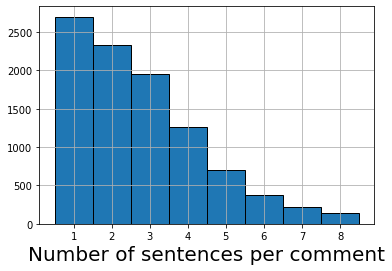

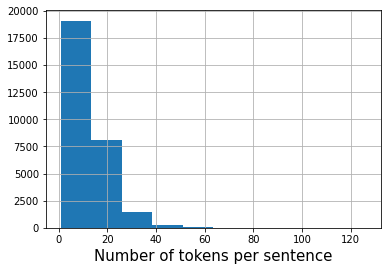

In [ ]:
#Number of sentences per comment
number_of_sentences_plot = complete_data_df_processed.groupby(['comment_id']).size().hist(bins=np.arange(0,9)+0.5, ec="k")
number_of_sentences_plot.set_xlabel("Number of sentences per comment",fontsize=20)
plt.show()

#Number of tokens per sentence
tokens_per_sentence_plot = complete_data_df_processed["number_of_tokens"].hist()
tokens_per_sentence_plot.set_xlabel("Number of tokens per sentence",fontsize=15)
plt.show()

In [ ]:
#Number of positive, negative and neutral sentiments in comments
ratings = reviews_df.groupby(['stars']).size()
ratings

stars
1    40000
2    40000
3    40000
4    40000
5    40000
dtype: int64

In [ ]:
complete_data_df_processed = complete_data_df_processed[complete_data_df_processed['number_of_tokens'].apply(lambda x: x < 100)]

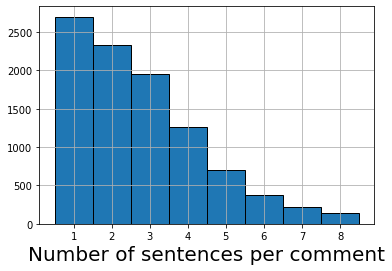

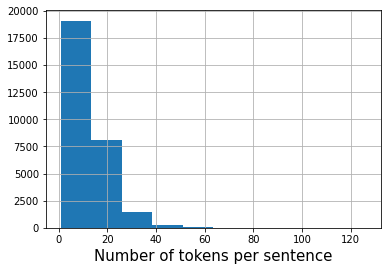

In [ ]:
#After removing the outliers
#Number of sentences per comment
number_of_sentences_plot = complete_data_df_processed.groupby(['comment_id']).size().hist(bins=np.arange(0,9)+0.5, ec="k")
number_of_sentences_plot.set_xlabel("Number of sentences per comment",fontsize=20)
plt.show()

#Number of tokens per sentence
tokens_per_sentence_plot = complete_data_df_processed["number_of_tokens"].hist()
tokens_per_sentence_plot.set_xlabel("Number of tokens per sentence",fontsize=15)
plt.show()

In [ ]:
complete_data_df_processed.to_json(processed_data_location + '/processed_data_without_embeddings_no_outliers.json')